In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df = pd.read_excel('Training data.xlsx')

In [66]:
x_train = np.array(df.iloc[:,0:8])
y_train = np.array(df.iloc[:,8]).reshape(-1,1)

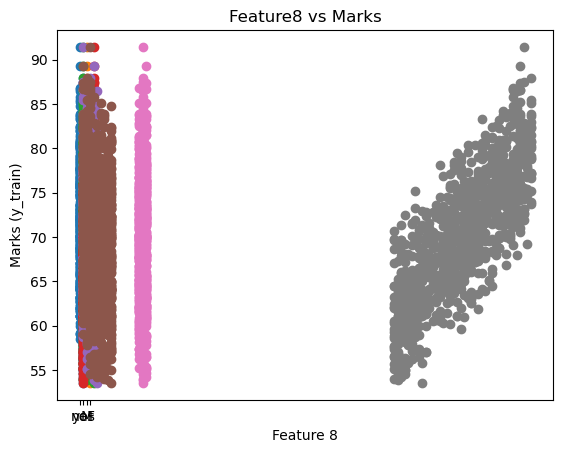

In [67]:
# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
for i in range(x_train.shape[1]):
    plt.scatter(x_train[:,i],y_train)
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel(f'Marks (y_train)')
    plt.title(f'Feature{i+1} vs Marks')
# Also do label encoding for features not represented in numbers
#Label encoding for Yes or No
x_train[:, 0] = np.where(x_train[:, 0] == 'yes', 1, 0)

In [68]:
# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
    x_train[x_train =='yes'] = 1
    x_train[x_train == 'no'] = 0
    x_train[x_train == 'M'] = 0
    x_train[x_train == 'F'] = 1
    return x_train
x_train = feature_changing(x_train)

In [69]:
def z_score(x_train):
    x_mean = np.mean(x_train)
    x_std = np.std(x_train)
    x_train = (x_train - x_mean)/x_std
    return x_train,x_std,x_mean

In [70]:
def cost(x_train,y_train,w,b):
    n = len(x_train)
    loss = ((np.sum(((y_train) - (np.dot(x_train,w) + b))**2))/(2*n))
    return loss

In [71]:
def gradient_descent(x_train,y_train,w,b):
    n = len(y_train)
    alpha = 0.0001
    iterations = 1000
    
    for _ in range(iterations):
        y_pred = np.dot(x_train,w) + b
        dw = np.dot(x_train.T,(y_pred - y_train))
        db = np.sum(y_pred - y_train)
        w = w - alpha*(dw)
        b = b - alpha*db
        if (_%100 == 0):
            J = np.sum(((np.dot(x_train,w) + b ) - y_train)**2)/(2*n)
    return w,b

In [73]:
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()

In [74]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

In [75]:
while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)
x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

In [80]:
print(y_predict[:10])

[[74.63072401607607]
 [65.27034702601838]
 [79.19708677769482]
 [62.6880317459165]
 [67.85561217205355]
 [75.4410354258353]
 [77.02121645520211]
 [75.94620318334184]
 [72.51582701394797]
 [71.61161475819567]]


In [81]:
accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
